# 7-11

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#TODO: add na_Values
netflix = pd.read_csv('data/netflix_titles.csv')
imdbMovies = pd.read_csv('data/IMDb movies.csv')
imdbratings = pd.read_csv('data/IMDb ratings.csv')

/home/smackflad/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


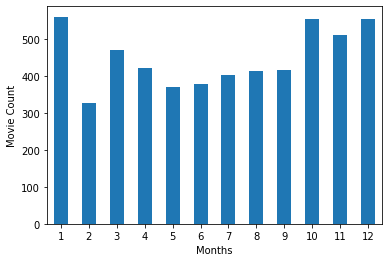

In [50]:
def ex_7():
    df = netflix.dropna(subset=['type', 'date_added', 'show_id'])
    movies = df[df['type'] == "Movie"]
    months = movies.groupby(pd.DatetimeIndex(movies['date_added']).month)['show_id'].count()
    ax= months.plot(kind="bar", rot=0)
    ax.set_xlabel("Months")
    ax.set_ylabel("Movie Count")
ex_7()

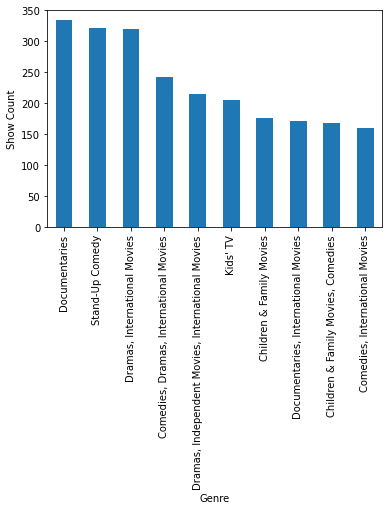

In [57]:
def ex_8(): #TODO
    df= netflix.dropna(subset=['listed_in', 'show_id'])
    genre = df.groupby(by=["listed_in"])['show_id'].count()
    genre= genre.sort_values(ascending=False)
    # print(genre)
    ax= genre.head(10).plot(kind='bar')
    ax.set_xlabel("Genre")
    ax.set_ylabel("Show Count") #TODO: show? film?
ex_8()

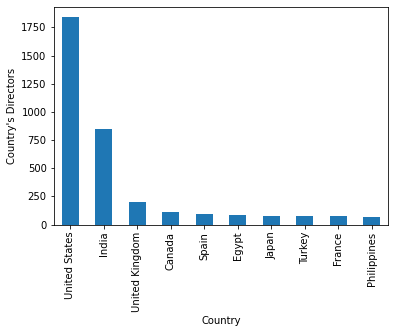

In [60]:
def ex_9_a(n):
    #skino8etes ana xwra, me n prwtoys skino8etes
    df = netflix.dropna(subset=['country', 'director'])
    countries = df.groupby(by=['country'])['director'].count()
    countries = countries.sort_values(ascending=False)
    ax = countries.head(n).plot(kind='bar')
    ax.set_xlabel("Country")
    ax.set_ylabel("Country's Directors")
ex_9_a(10)

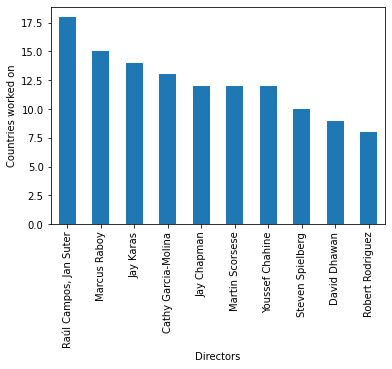

In [64]:
def ex_9_b(n):
    #se poses xwres exei ftiaksei enas skino8eths tainia, me n prwtoyw skino8etes
    df = netflix.dropna(subset=['director', 'country'])
    dirs = df.groupby(by=['director'])['country'].count()
    dirs= dirs.sort_values(ascending=False)
    ax= dirs.head(n).plot(kind='bar')
    ax.set_xlabel("Directors")
    ax.set_ylabel("Countries worked on")
ex_9_b(10) #TODO: make this int only

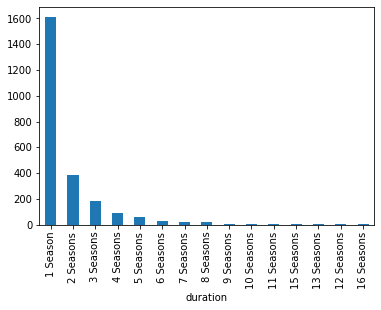

In [51]:
def ex_10():
    df= netflix.dropna(subset=['type', 'duration', 'show_id'])
    shows = df[df['type'] == "TV Show"]
    seasons = shows.groupby(by=['duration'])['show_id'].count()
    seasons = seasons.sort_values(ascending=False)
    seasons.plot(kind='bar') #TODO: better in bar graph?
ex_10()

In [56]:
def ex_11():
    df_netflix = netflix.dropna(subset=['title', 'release_year', 'director'])
    df_imdbMovies = imdbMovies.dropna(subset=['original_title', 'year', 'director'])
    df_imdbRatings = imdbratings.dropna(subset=['imdb_title_id'])
    merge = pd.merge(df_netflix, df_imdbMovies, how="inner", left_on=["title", "release_year", "director"], right_on=["original_title", "year","director"])
    merge = pd.merge(merge, df_imdbRatings, how="inner", left_on=["imdb_title_id"], right_on=["imdb_title_id"])
    merge = merge.sort_values(['weighted_average_vote'], ascending=False)
    merge = merge[['original_title', 'weighted_average_vote']]
    print(merge.head(10))
ex_11()

                                    original_title  weighted_average_vote
646                               Schindler's List                    8.9
591                                   Pulp Fiction                    8.9
811  The Lord of the Rings: The Return of the King                    8.9
366                                      Inception                    8.8
812          The Lord of the Rings: The Two Towers                    8.7
555                          Oththa Seruppu Size 7                    8.6
428                                        Koshish                    8.6
295                                       Gol Maal                    8.6
63                              American History X                    8.5
765                                   The Departed                    8.5
